
# <font color=blue> Exploratory Data Analysis on loan data from LendingClub to minimize the risk of default for all loans issued during 2007 to 2011. </font>

# <font color=green> 1. Introduction </font>

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("loan.csv")

C:\Users\Santhosh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# <font color=green> 2. Understanding the Data </font>

Importing the Data Dictionary

In [3]:
data_dic=pd.read_excel("Data_Dictionary.xlsx")
from IPython.display import display, HTML
display(HTML(data_dic.to_html(classes='table table-bordered')))

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [4]:
INFO=data.info(verbose=True, null_counts=True)
print(INFO, '\n')
print('Data Type of INFO is', type(INFO))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [5]:
#Identifying the number of Rows and Columns present in Original Dataset
print('No. of Rows in the dataset =',data.shape[0])
print('No. of Columns in the dataset =',data.shape[1])

No. of Rows in the dataset = 39717
No. of Columns in the dataset = 111


In [6]:
data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


<font color=red>
    
#### Observations from the Dataset:
    
- The loan dataset contains 111 Columns and 39717 Rows
- There are 74 float,13 integer and 24 object datatypes
</font>

# <font color=green> 3. Data Cleaning and Manipulation </font>

In [7]:
missingdata_percentage = (1-(data.count() / len (data)))*100
print(round(missingdata_percentage,2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [8]:
type(missingdata_percentage)

pandas.core.series.Series

In [9]:
toremove = missingdata_percentage[missingdata_percentage>25]
print(toremove)
len(toremove)

desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

58

In [10]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Removal of Columns with more missing values (more than 25% of data)

In [11]:
null_percentage=(data.isnull().sum()/data.shape[0])*100
null_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [12]:
col_to_drop=null_percentage[null_percentage>25].keys()
print(col_to_drop)
print('\nTotal No.of Columns with missing values greater than 25% =', len(col_to_drop))

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [13]:
data2=data.drop(col_to_drop, axis =1)

In [14]:
print(data2)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

In [15]:
null_percentage=(data2.isnull().sum()/data2.shape[0])*100
null_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
data3=data2.dropna()

In [17]:
null_percentage3=(data3.isnull().sum()/data3.shape[0])*100
null_percentage3

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [18]:
data3['int_rate']=data3['int_rate'].str.rstrip("%").astype(float)

<ipython-input-18-20f8856250cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['int_rate']=data3['int_rate'].str.rstrip("%").astype(float)


In [19]:
data3['revol_util']=data3['revol_util'].str.rstrip("%").astype(float)

<ipython-input-19-647769d43b45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['revol_util']=data3['revol_util'].str.rstrip("%").astype(float)


In [20]:
print(data3)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
1       60 months     15.27        59.83     C        C4  ...          119.66 

In [22]:
data3.to_csv('data3.csv')

## To identify the Numerical and Categorical variables in the columns

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  float64
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

<font color=red>
    
#### Observations from the Dataset where missing values are removed:
- The dataset contains 53 Columns and 36431 Rows
- There are 33 numerical variables and 20 object datatypes
</font>

# <font color=green> 4. Exploratory Data Analysis </font>

#### <font color=blue> Loan Status: Fully Paid vs. Default </font>

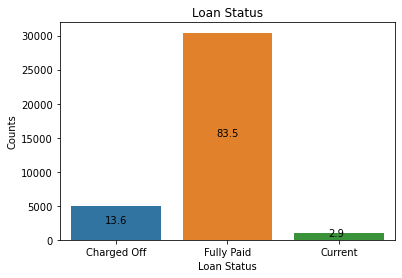

In [24]:
ax = sns.countplot(x=data3['loan_status'])
plt.rcParams["figure.figsize"]=[6.00,6.00]
plt.rcParams["figure.autolayout"]=True 
total=len(data3['loan_status'])
for p in ax.patches:
    percentage = '{:.1f}'.format((100*p.get_height()/total))
    x = p.get_x() + (p.get_width() - 0.5)
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x,y))
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Counts')
plt.show()

<font color=red>
 The Frequency Distribution plot on the column “Loan Status” clearly shows that the data is highly imbalanced. 

- 83.5 % loans are fully paid

- Only 13.6 % loans are Charged Off
    
</font>


#### <font color=blue> Loan Amount Values vs Loan Default  </font>

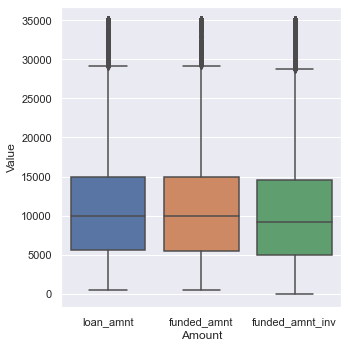

In [25]:
df = pd.DataFrame(data=data3,columns=['loan_amnt','funded_amnt','funded_amnt_inv'])
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='variable',y='value',data=pd.melt(df))
plt.xlabel('Amount')
plt.ylabel('Value')
plt.show()

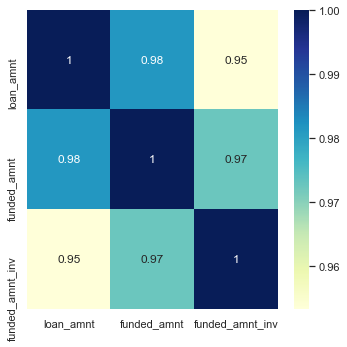

In [26]:
# To find Coorelation between Loan Amount, Funded Amount and Funded Amount by Investors
sns.heatmap(data3[['loan_amnt', 'funded_amnt', 'funded_amnt_inv' ]].corr(), cmap='YlGnBu', annot =True)

<font color=red>
--> From the Grouped Box plot, the distribution of values of 3 variables namely, Loan Amount, Funded Amount and the Funded Amount by the Investors are almost similar. 

--> Also these 3 variables are highly correlated as seen in the Pearson Correlation Matrix.

--> So, for the further analysis only the column "Loan Amount" is considered.
    
</font>


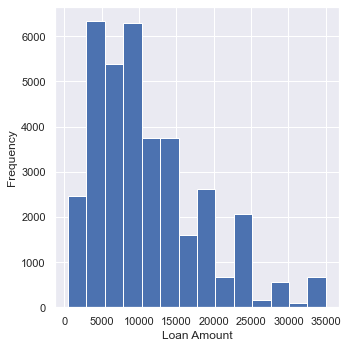

In [27]:
data3['loan_amnt'].hist(bins=14)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

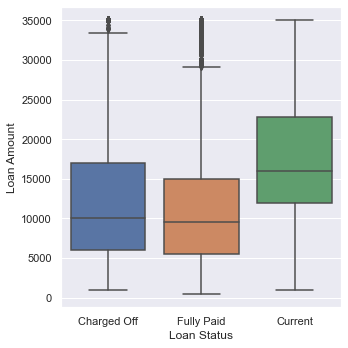

In [28]:
sns.boxplot(data = data3, x = 'loan_status', y = 'loan_amnt')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

<font color=red>
Although the median of the Loan Amount for Fully Paid and Charged Off are comparable,
when loan amount exceeds 30000 more likely it could be default.
</font>


#### <font color=blue> Loan Grading & Interest Rate vs. Loan Default  </font>

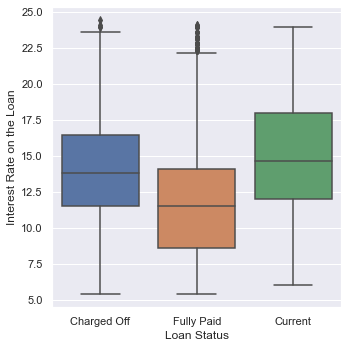

In [29]:
sns.boxplot(data = data3, x = 'loan_status', y = 'int_rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate on the Loan')
plt.show()

Text(0, 0.5, 'Percentage')

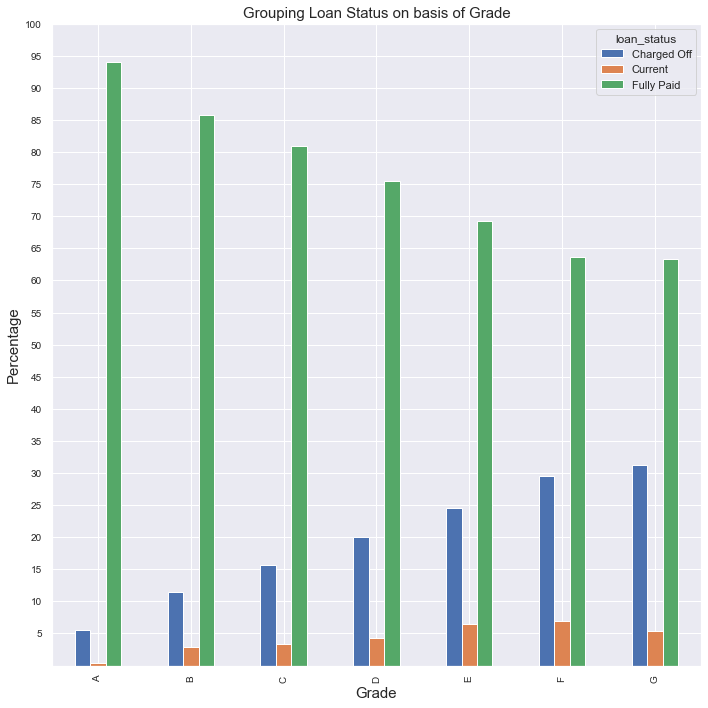

In [30]:
ct2graph = data3.groupby('grade').loan_status.value_counts(normalize=True).mul(100).round(1).unstack().plot(kind='bar', figsize = ( 10 , 10 ),yticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], fontsize = 10)
ct2graph.grid('on', which='minor', axis='y' )
ct2graph.grid('on', which='major', axis='y' )
ct2graph.set_title('Grouping Loan Status on basis of Grade',fontsize = 15)
ct2graph.set_xlabel("Grade",fontsize = 15)
ct2graph.set_ylabel("Percentage",fontsize = 15)

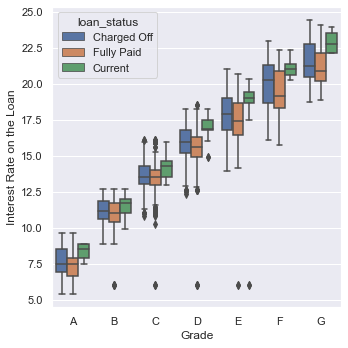

In [31]:
sns.boxplot(data = data3, x = 'grade', y = 'int_rate',hue = 'loan_status',order=['A', 'B', 'C', 'D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Interest Rate on the Loan')
plt.show()

In [32]:
ct1 = pd.crosstab(data3.loan_status, data3.grade, margins = True, margins_name = 'Subtotals', normalize = 'columns').style.format('{:.2%}')
print("\n Cross Table Comparing Loan Status (in Number of Percentage) against Loan Grades")
ct1


 Cross Table Comparing Loan Status (in Number of Percentage) against Loan Grades


grade,A,B,C,D,E,F,G,Subtotals
loan_status,,,,,,,,
Charged Off,5.59%,11.35%,15.73%,20.11%,24.45%,29.51%,31.21%,13.57%
Current,0.38%,2.87%,3.36%,4.35%,6.38%,6.91%,5.37%,2.93%
Fully Paid,94.03%,85.77%,80.90%,75.54%,69.17%,63.57%,63.42%,83.51%


<font color=red>
At interest rates higher than 20 - 22.5 %, more the chances for loan default.
Loan grades F and G are associated with risky applicants,
where interest rates are also high and as per the loan grading more percentage of loan defaults are at grades F and G.
</font>


#### <font color=blue> Term vs. Loan Default  </font>

In [33]:
ct2 = pd.crosstab(data3.loan_status, data3.term, normalize = 'columns').style.format('{:.2%}')
print("\n Cross Table Comparing Loan Status (in Number of Percentage) against Loan Term Period")
ct2


 Cross Table Comparing Loan Status (in Number of Percentage) against Loan Term Period


term,36 months,60 months
loan_status,,
Charged Off,10.35%,22.01%
Current,0.00%,10.60%
Fully Paid,89.65%,67.39%


Text(0, 0.5, 'Percentage')

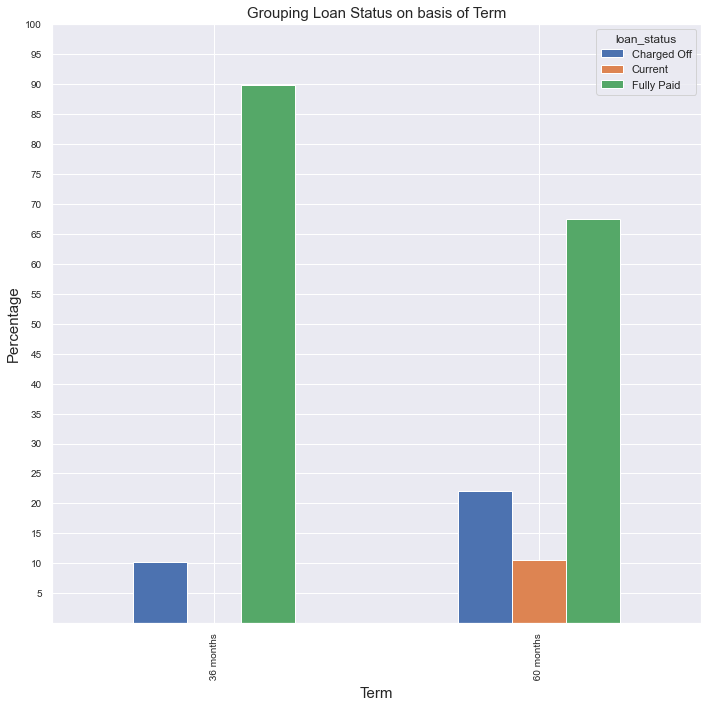

In [34]:
ct1graph = data3.groupby('term').loan_status.value_counts(normalize=True).mul(100).round(1).unstack().plot(kind='bar', figsize = ( 10 , 10 ),yticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], fontsize = 10)
ct1graph.grid('on', which='minor', axis='y' )
ct1graph.grid('on', which='major', axis='y' )
ct1graph.set_title('Grouping Loan Status on basis of Term',fontsize = 15)
ct1graph.set_xlabel("Term",fontsize = 15)
ct1graph.set_ylabel("Percentage",fontsize = 15)

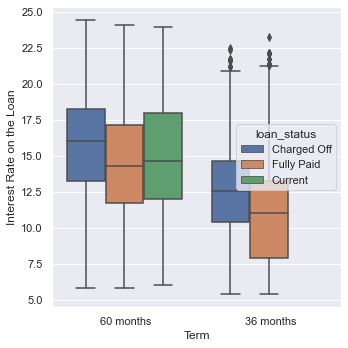

In [35]:
sns.boxplot(data = data3, x = 'term', y = 'int_rate',hue = 'loan_status')
plt.xlabel('Term')
plt.ylabel('Interest Rate on the Loan')
plt.show()

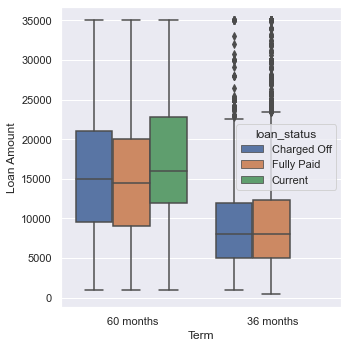

In [36]:
sns.boxplot(data = data3, x = 'term', y = 'loan_amnt',hue = 'loan_status')
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.show()

<font color=red>

<font color=red>

<font color=red>

- Loans with 60 months term are more likely to default
- Loans with 60 months term are with high interest rates
- Loan amount of the 60 month term period are higher than that of 36 months
</font>

#### <font color=blue> Annual Income of the borrower vs. Loan Default  </font>

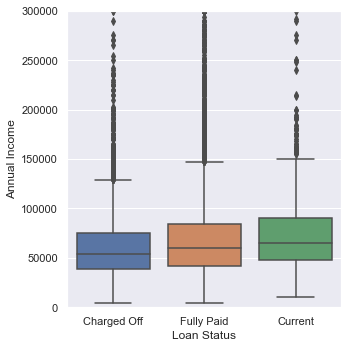

In [37]:
sns.boxplot(data = data3, x = 'loan_status', y = 'annual_inc')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.ylim(0,300000)
plt.show()

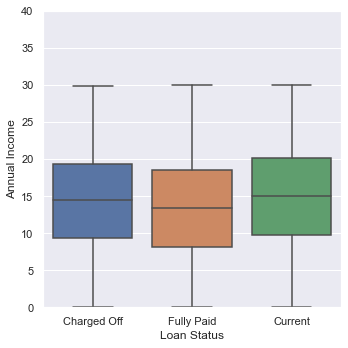

In [38]:
sns.boxplot(data = data3, x = 'loan_status', y = 'dti')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.ylim(0,40)
plt.show()

<font color=red>

- From the Grouped Barplot, it reveals no significant trend observed in Loan Status categories for Annual Income and Debt to Income Ratio 
</font>

#### <font color=blue> Home Ownership of the borrower vs. Loan Default  </font>

In [39]:
ct3 = pd.crosstab(data3.loan_status, data3.home_ownership , margins = True, margins_name = 'Subtotals', normalize = 'columns').style.format('{:.2%}')
print("\n Cross Table Comparing Loan Status (in Number of Percentage) against Home Ownership")
ct3


 Cross Table Comparing Loan Status (in Number of Percentage) against Home Ownership


home_ownership,MORTGAGE,OTHER,OWN,RENT,Subtotals
loan_status,,,,,
Charged Off,12.65%,19.15%,13.44%,14.41%,13.57%
Current,3.66%,0.00%,2.72%,2.28%,2.93%
Fully Paid,83.69%,80.85%,83.84%,83.30%,83.51%


<font color=red>
    Among the defaulters, those in Rental house are higher than those in own house. This suggest that borrowers with own home are less likely to default

</font>

# <font color=green> 5. Important Observations from the Analysis </font>

<font color=red>
    
## 1. Loan Status in this dataset clearly shows that the data is highly imbalanced. 83.5 % loans are fully paid and only 13.6 % loans are Charged Off.
    
## 2.When loan amount exceeds 30000 more likely it could be default
    
## 3. At interest rates higher than 20 - 22.5 % chances for loan default.

## 4. Loans with 60 months term are more likely to default.
    
## 5. Loans with 60 months term are with high interest rates
    
## 6. Borrowers with own home are less likely to default
    
</font>


<font color=orange>
    **********************************************************************************************************************************************************

Other Analysis form this Dataset

Text(0, 0.5, 'Count')

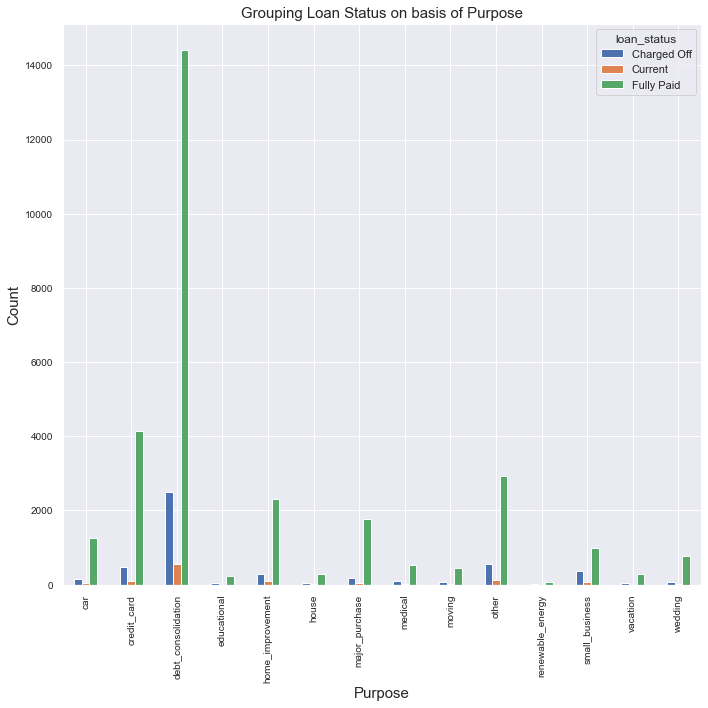

In [40]:
ct9graph = data3.groupby('purpose').loan_status.value_counts().unstack().plot(kind='bar', figsize = ( 10 , 10 ), fontsize = 10)
ct9graph.grid('on', which='minor', axis='y' )
ct9graph.grid('on', which='major', axis='y' )
ct9graph.set_title('Grouping Loan Status on basis of Purpose',fontsize = 15)
ct9graph.set_xlabel("Purpose",fontsize = 15)
ct9graph.set_ylabel("Count",fontsize = 15)

Text(0, 0.5, 'Count')

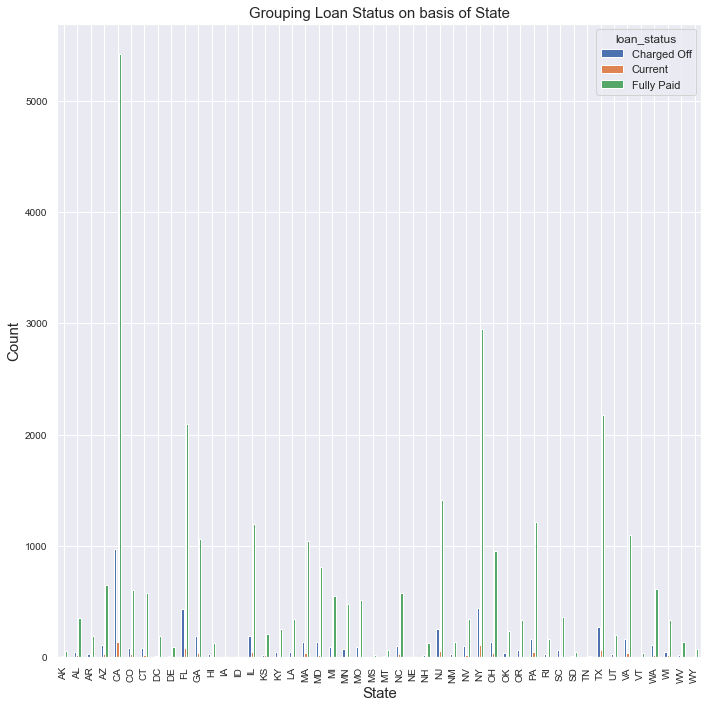

In [41]:
ct10agraph = data3.groupby('addr_state').loan_status.value_counts().unstack().plot(kind='bar', figsize = ( 10 , 10 ), fontsize = 10)
ct10agraph.grid('on', which='minor', axis='y' )
ct10agraph.grid('on', which='major', axis='y' )
ct10agraph.set_title('Grouping Loan Status on basis of State',fontsize = 15)
ct10agraph.set_xlabel("State",fontsize = 15)
ct10agraph.set_ylabel("Count",fontsize = 15)

Text(0, 0.5, 'Percentage')

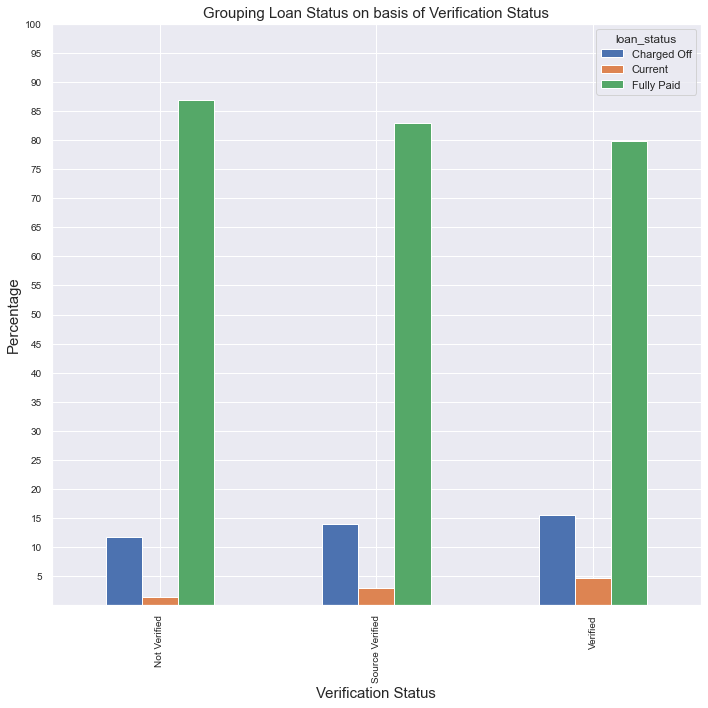

In [42]:
ct7graph = data3.groupby('verification_status').loan_status.value_counts(normalize=True).mul(100).round(1).unstack().plot(kind='bar', figsize = ( 10 , 10 ),yticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], fontsize = 10)
ct7graph.grid('on', which='minor', axis='y' )
ct7graph.grid('on', which='major', axis='y' )
ct7graph.set_title('Grouping Loan Status on basis of Verification Status',fontsize = 15)
ct7graph.set_xlabel("Verification Status",fontsize = 15)
ct7graph.set_ylabel("Percentage",fontsize = 15)